# **TECHNOLOGIA BLOCKCHAIN - Zastosowania inne niż kryptowaluty**
Adrian Sekuła, Nicolas Bełz

>Blockchain jest bazą danych przechowującą dane w formie łańcucha bloków. Oznacza to, że wprowadzone dane są nieodwracalne. Zdecentralizowany charakter tej technologii sprawia, że można ją wykorzystać w wielu dziedzinach.



*Blockchain został po raz pierwszy opisany w 1991 roku przez Stuarta Habera i Scotta Stornett’a*



# **Hash**
Hash to wynik działania operacji matematycznej na określonym ciagu znaków. 
Operacje te nazywamy funkcją skrótu lub funkcją haszującą. Funkcja ta przekształca podane przez użytkownika dane wejściowe na krótką wartość znakową.
Funkcja skrótu nie jest odwracalna. 
Wartość wyjściowa po zastosowaniu funkcji skrótu będzie zawsze taka sama tzn. jej długość nie zależy od długości danych podanych przez użytkownika ani od czasu jej wykonywania. 
Wykonana funkcja skrótu na tym samym pliku za każdym razem zwróci taki sam wynik. Wynik ten często nazywany jest jego odciskiem palca. 

Funkcja hash w technologii blockchain zapewnia bezpieczeństwo oraz pewność, że dane we wcześniejszych blokach nie były zmieniane

**Zastosowanie hash w blockchain**

Hash znajduje się w każdym bloku łańcucha blockchain. W każdym następnym bloku znajduje się hash poprzedniego bloku. 

**Popularne funkcje skrótu:**

*   MD5 - 32 znakowa (128 bitowa) wartość końcowa,
*   SHA-1 - 40 znakowa (160-bitowa) wartość końcowa,
*   SHA-256 - 64 znakowa (256-bitowa) wartość końcowa.






In [10]:
from hashlib import sha256

data = "test"

print("Text:",data,"\nSHA 256:", sha256(data.encode()).hexdigest())

Text: test 
SHA 256: 9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


# **Blok** 
Jest podstawowym elementem wchodzącym w skład łańcucha blockchain. Składa się z nagłówka i danych

**Informacje zawarte w nagłówku:**
* Zapisane odniesienie do poprzedniego bloku w łancuchu w postaci hasha
* Znacznik czasowy utworzenia bloku


*Rozmiar bloku uzależniony jest od konkretnej implementacji oraz jej charakterystyki.*

In [11]:
from hashlib import sha256
from datetime import datetime

class Block():

    def __init__(self, previous_block_hash, data):
        self.previous_block_hash = previous_block_hash
        self.data = data
        self.nonce = 0
        self.block_hash = None
        self.creation_date = datetime.now().strftime("%H:%M:%S %d/%m/%Y")

    def compute_hash(self):
        block_data = self.previous_block_hash + self.data
        block_hash = sha256(block_data.encode()).hexdigest()
        return block_hash


b1 = Block("Initial hash", "data")

print(b1.compute_hash())
    



a5e81f88599a6faca9ee021fafecc88912c8e5714e0f8b1c7bed692cab698eb9


# **Łańcuch bloków (Blockchain)**

Blockchain (z ang. łańcuch bloków) jest zdecentralizowaną, najczęściej otwartoźródłową bazą danych w sieci internet. Architektura Peer-to-Peer pozwala na działanie bez udziału centralnie sterujących komputerów. Jeden blok zawiera w sobie określoną ilość danych, następnie po jego zamknięciu tworzy się kolejny blok danych, a za nim kolejny i następny, tworząc pewien rodzaj łańcucha. Jeśli chcemy dodać nową informację, to nie nadpisujemy istniejących już bloków, lecz dodajemy nowy. Weryfikacja transakcji opiera się na rozproszonym konsensusie. Aby dodać nowy blok wszystkie komputery muszą go zatwierdzić. Proces ten często zwany jest „kopaniem / miningiem” bądź „wydobywaniem”. Rozwiązywaniem skomplikowanych operacji matematycznych wymaganych do powstania nowego bloku zajmują się tzw. górnicy. Cały ten opisany proces zwany jest Proof of Work. 

In [12]:
from hashlib import sha256
from datetime import datetime
from random import randint
from sys import maxsize
from datetime import datetime


class Blockchain():
    block_list = []

    def __init__(self):
        self.block_list.append(self.genesis_block())

    def genesis_block(self):
        genesis_block_hash = '0' * 64
        genesis_block_data = 'Genesis Block'
        b = Block(genesis_block_hash, genesis_block_data)
        b.block_hash = '0' * 64
        return b

    def add_block(self, data):
        b = Block(self.previous_block().block_hash, data)
        b.block_hash = b.compute_hash()
        self.block_list.append(b)

    def previous_block(self):
        return self.block_list[-1]

    def __str__(self):
        return_string = ""
        for block in enumerate(self.block_list):
            return_string += f"Block: {block[0]} ({block[1].creation_date})\nHash: {block[1].block_hash}\nData: {block[1].data}\n\n"

        return return_string


blockchain1 = Blockchain()

blockchain1.add_block("blok numer 2")

blockchain1.add_block(":).")

blockchain1.add_block("blok numer 4")

print(blockchain1)


Block: 0 (14:05:13 19/01/2022)
Hash: 0000000000000000000000000000000000000000000000000000000000000000
Data: Genesis Block

Block: 1 (14:05:13 19/01/2022)
Hash: b88578d3e6d6d50c782508fa632830bdbdfeb816d193899cf0404def764e8c5a
Data: blok numer 2

Block: 2 (14:05:13 19/01/2022)
Hash: a66decd291e0275e8a1c335af0de42c4c5bb30e156f2f451353e9e8ad35e7a6f
Data: :).

Block: 3 (14:05:13 19/01/2022)
Hash: 16b93c8aab975020f1b37e70dfb59ce24c7e89e5a360df15f9ad2e10ee6b5811
Data: blok numer 4




# **Trudność "kopania" nowych bloków**

Jeżeli chcemy, aby bloki nie mogły być dodawane zbyt często, możemy zdefiniować trudność kopania. Polega ona najczęsciej na tym, aby hash bloku zaczynał się od zdefiniowanej ilości zer. Im większa liczba zer tym większa moc obliczeniowa oraz większy czas potrzebny do wykopania danego bloku.

In [13]:
from hashlib import sha256
from datetime import datetime
from random import randint
from sys import maxsize

class Blockchain():
    difficulty = 4
    block_list = []

    def __init__(self):
        self.block_list.append(self.genesis_block())

    def genesis_block(self):
        genesis_block_hash = '0' * 64
        genesis_block_data = 'Genesis Block'
        b = Block(genesis_block_hash, genesis_block_data)
        b.block_hash = '0' * 64
        return b

    def add_block(self, data):
        b = Block(self.block_list[-1].block_hash, data)
        self.mine(b)

    def get_previous_block(self):
        return self.block_list[-1]

    def mine(self, block):

        self.nonce = randint(0, maxsize)
        block_data = block.previous_block_hash + block.data + str(self.nonce)
        block_hash = sha256(block_data.encode()).hexdigest()

        while not block_hash.startswith(self.difficulty * '0'):

            self.nonce = randint(0, maxsize)
            block_data = block.previous_block_hash + \
                block.data + str(self.nonce)
            block_hash = sha256(block_data.encode()).hexdigest()

        block.block_hash = block_hash
        block.creation_date = datetime.now().strftime("%H:%M:%S %d/%m/%Y")
        self.block_list.append(block)

    def increase_difficulty(self, by=0):
      if self.difficulty + by <= 64:
        self.difficulty += by
      else:
        return ValueError("Trudność nie może być większa od 64!")

    def decrease_difficulty(self, by=0):
      if self.difficulty - by >= 0:
        self.difficulty -= by
      else:
        return ValueError("Trudność nie może być mniejsza niż 0!")

    def __str__(self):
        return_string = ""
        for block in enumerate(self.block_list):
            return_string += f"Block: {block[0]} ({block[1].creation_date})\nHash: {block[1].block_hash}\nData: {block[1].data}\n\n"

        return return_string


blockchain1 = Blockchain()

blockchain1.add_block("blok numer 2 :)")

blockchain1.increase_difficulty(by=1)

blockchain1.add_block("blok numer 3")

print(blockchain1)


Block: 0 (14:05:13 19/01/2022)
Hash: 0000000000000000000000000000000000000000000000000000000000000000
Data: Genesis Block

Block: 1 (14:05:13 19/01/2022)
Hash: 0000a6220ad2b7a2b253a060875f23a792b6053d8224220c05ee7a0c6ead5cd1
Data: blok numer 2 :)

Block: 2 (14:05:16 19/01/2022)
Hash: 00000c88f814e4408ca23590831f741a8332ff4555d6ed473e3f64cda92ed403
Data: blok numer 3




# **//ZASTOSOWANIE**

# **NAJPOPULARNIEJSZE METODY ATAKU**





#    **Phishing**
Jak w przypadku każdego systemu informatycznego najbardziej wrażliwym elementem jest sam człowiek korzystający z niego. Każdego roku tysiące osób padają ofiarami ataków phishingowych.
Najczęściej ofiary klikają w niebezpieczne linki znajdujące się w złośliwych emailach i tym samym pozbywają się swoich kluczy. 
Każdy portfel w sieci blockchain ma swój własny klucz publiczny oraz prywatny. Klucz publiczny wykorzystywany jest jako adres portfela służący do wysyłania między użytkownikami elementów znajdujących się w danej sieci. Klucz prywatny służy do uzyskania dostępu do naszego portfela. Dlatego też, bezpieczeństwo przechowywanych danych opiera się w całkowitym stopniu na tajności naszego klucza prywatnego. Jeżeli atakujący uzyska nasz klucz prywatny, ma wszystko czego potrzeba do (najczęściej) kradzieży środków z naszego portfela.

Co ciekawe w internecie instnieje mnóstwo baz danych z wszystkimi możliwymi kluczami prywatnymi np. sieci Bitcoin. Każdy może sobię ją dowolnie przeglądać. Mimo tego, że mamy dostęp do wszystkich kluczy prywatnych i teoretycznie powinniśmy znaleźć portfel na którym znajdują się środki to w praktyce ilość kluczy prywatnych (w przypadku sieci Bitcoin 2^256) sprawia, że jest to zadanie praktycznie niemożliwe.
[Przykładowa baza danych z kluczami prywatnymy sieci Bitcoin](https://allkeys.cc)

Przeanalizowanie wszystkich stron z powyższej bazy zajęło by 122,307,663,064,065,069,823,192,073,128,383,134,176,698,655,029,823,670 tysięcy lat przy założeniu, że każdej sekundy analizowali byśmy ich 3 miliardy.

#    **Routing Attack**


W teorii sieć blockchain powinna być siecią silnie niezcentralizowaną, jednak w praktyce niestety tak nie jest. Dla przykładu: 68% mocy obliczeniowej sieci Bitcoin znajduje się w jedynie dziesięciu sieciach. A 60% wszystkich transakcji przechodzi przez trzy te same sieci.

Następstwem powyższych statystyk jest atak **Partitioning**, którego celem jest przedzielenie sieci na 2 części.

**Atak Partitioning** - podzielenie sieci na pół,
atak widoczny, obejmujący całość sieci

Realizacja polega na rozgłoszeniu komunikatów w sieci BGP, w wyniku których ruch który ma trafiać do danego routera, najpierw zawsze będzie trafiał do złośliwego urządzenia przechwytującego pakiety

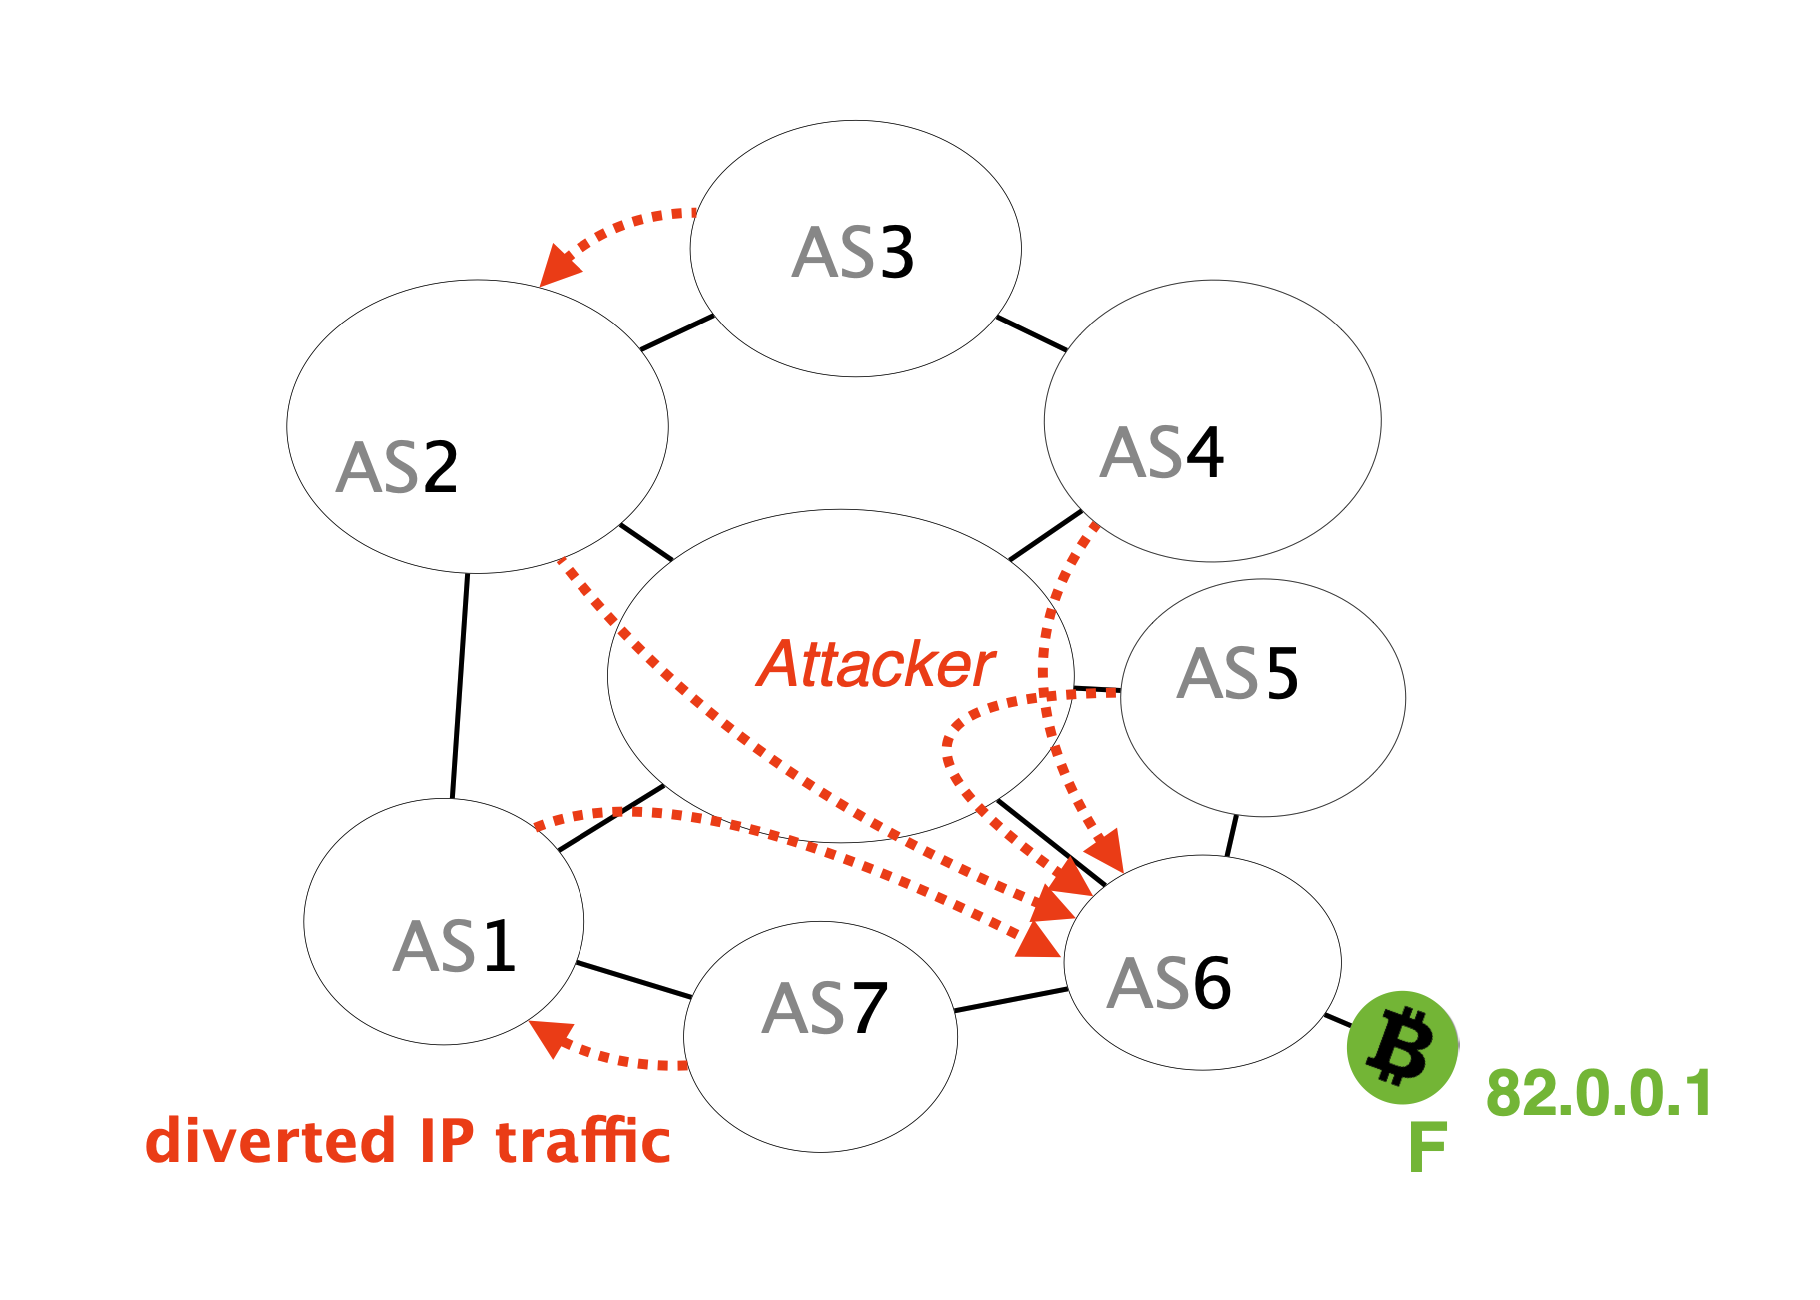

Dzięki umiejętnemu rozesłaniu komunikatów o prefixach atakujący może podzielić sieć na pół i przechwytywać cały ruch przez nią przechodzący.

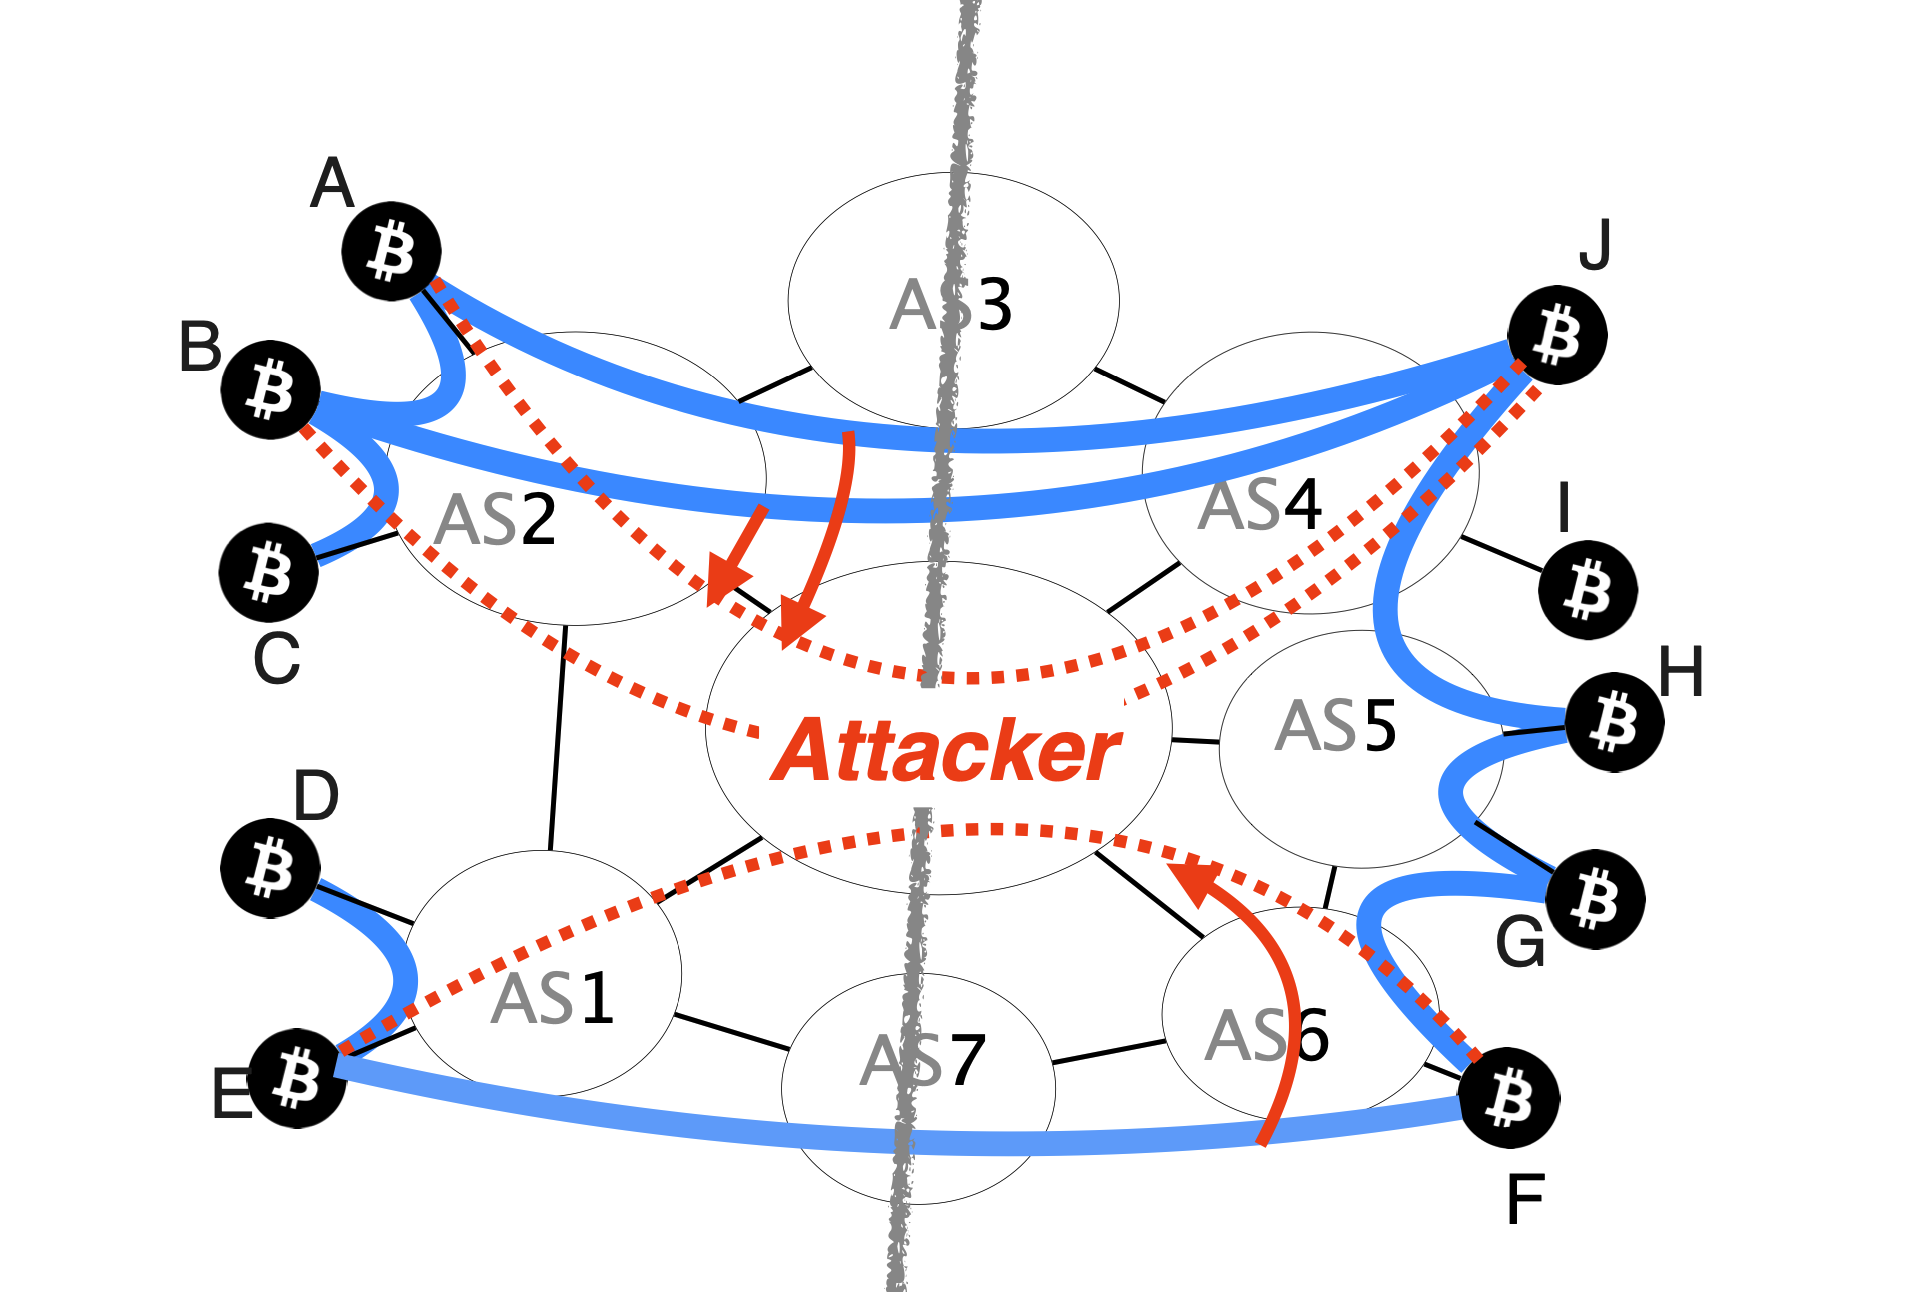
Atakujący może w każdej chwili rozłączyć ruch z jednej strony sieci do drugiej, dzięki czemu przy zmianie jedynie 100 prefixów jest on w stanie zmniejszyć moc obliczeniową sieci o aż **połowę**

Przechwycenie wszystkich połączeń w danej sieci zajmuje często mniej niż 2 minuty

Atak działa, ponieważ BGP **nie sprawdza** wiarygodności rozsyłanych komunikatów, co oznacza, że każdy AS (Autonomic System) może rozgłośić taki prefix jaki tylko chce.

**Jak przeciwdziałać atakowi?**

Rozwiązanie krótkoterminowe: hostowanie wszystkich klientów sieci bitcoin w prefixach o masce /24

Rozwiazanie długoterminowe:
Używanie zabezpieczonych protokołów routingu np: S-BGP


#    **Atak 51%**

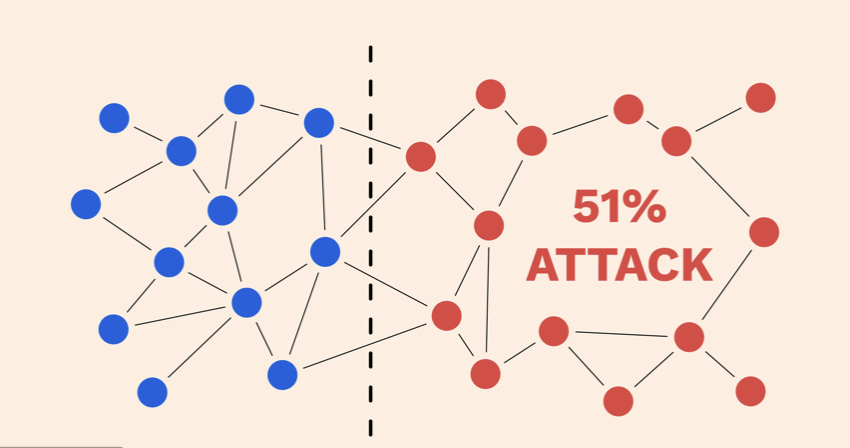

W sieci blockchain o tym co jest prawdą decyduje to, co przyjmuje większość sieci. Urządzenie podłączone do sieci "wierzy" tej stronie, która posiada większość mocy obliczeniowej wykorzystywanej do bieżącego potwierdzania operacji. Dlatego teoretycznie posiadając 51% mocy obliczeniowej całej sieci jesteśmy w stanie decydować samodzielnie o tym co się w danej sieci dzieje oraz jakie operacje będa wykonywane. Zagrożenia związane z przejęciem większości mocy obliczeniowej sieci to np.: tzw. double spending (wielokrotne wydawanie tych samych środków) czy fałszowanie wartości sald lub ogólnie informacji zawartych w blockchainie.

Atak ten, jeśli nie zostanie wykryty w momencie jego wykonywania, jest póżniej bardzo cięzki do wykrycia.

Zdobycie 51% mocy obliczeniowej danej sieci może odbyć się na 3 sposoby:
*   wynajęcie mocy obliczeniowej
*   stworzenie własnego zasobu mocy obliczeniowej
*   zgrupowanie istniejących zasobów mocy obliczeniowej (pooling)

Rozkład mocy obliczeniowej poszczególnych grup dla sieci Bitcoin na dzień 19.01.2022 wg. strony btc.com


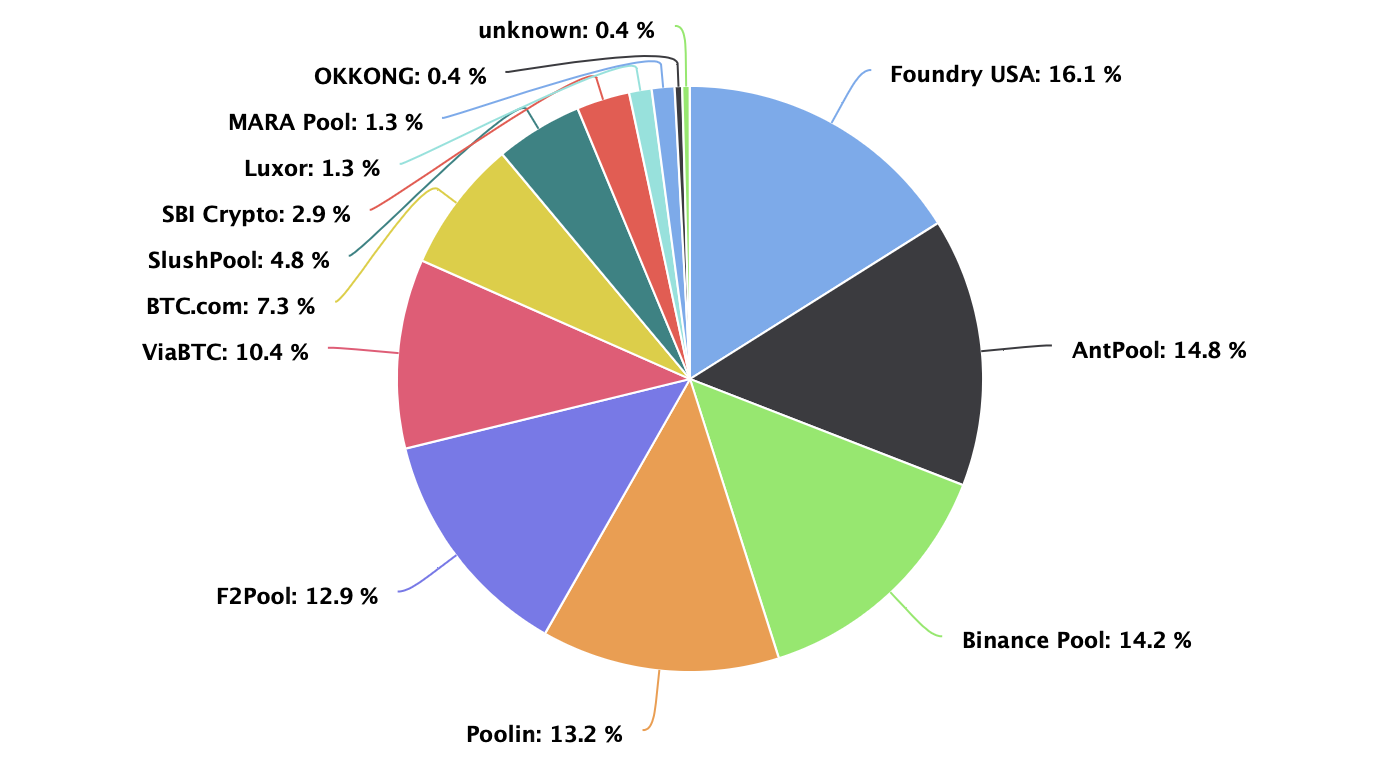

Na ten sposób ataku szczególnie narażone są sieci o mniejszej popularności i co za tym idzie mniejszej mocy obliczeniowej. Im sieć większa, tym cięzej jest ten atak wykonać

[Strona obrazująca teoretyczny koszt ataku 51% na najpopularniejsze sieci blockchain](https://www.exaking.com/51)

W przypadku sieci wykorzystujących algorytm **Proof of Work** atak polega na zdobyciu większości mocy obliczeniowej, natomiast w przypadku sieci opierających się na algorytmie **Proof of Stake** atak polega na zdobyciu większości "obstawianej" waluty danej sieci.
Jednak atak ten w przypadku sieci opartych na Proof Of Stake jest cięższy, gdyż wymaga posiadania 51% kapitalizacji rynkowej danej sieci (Jeśli sieć Bitcoin przekonwertowana zostałą by na algorytm Proof Of Stake, koszt ataku 51% na dzień 19.01.2022 wynosiłby 0.51 * 3 141 963 269 215 zł co daje nam 1 602 401 267 299,65 zł)
 

**Sposoby obrony przed atakiem 51%**

Nie istnieje możliwość całkowitego obronienia się przed tym atakiem, jednak istnieje sposób na znaczne jego utrudnienie. Polega on na akceptowaniu jedynie "starych" wpisów sald np: wielogodzinnych, przez co atak musi trwać znacznie dłużej oraz jego koszt jest dużo wyższy.



# **MECHANIZM KONSENSUSU**

**Czym jest mechanizm Konsensusu?**

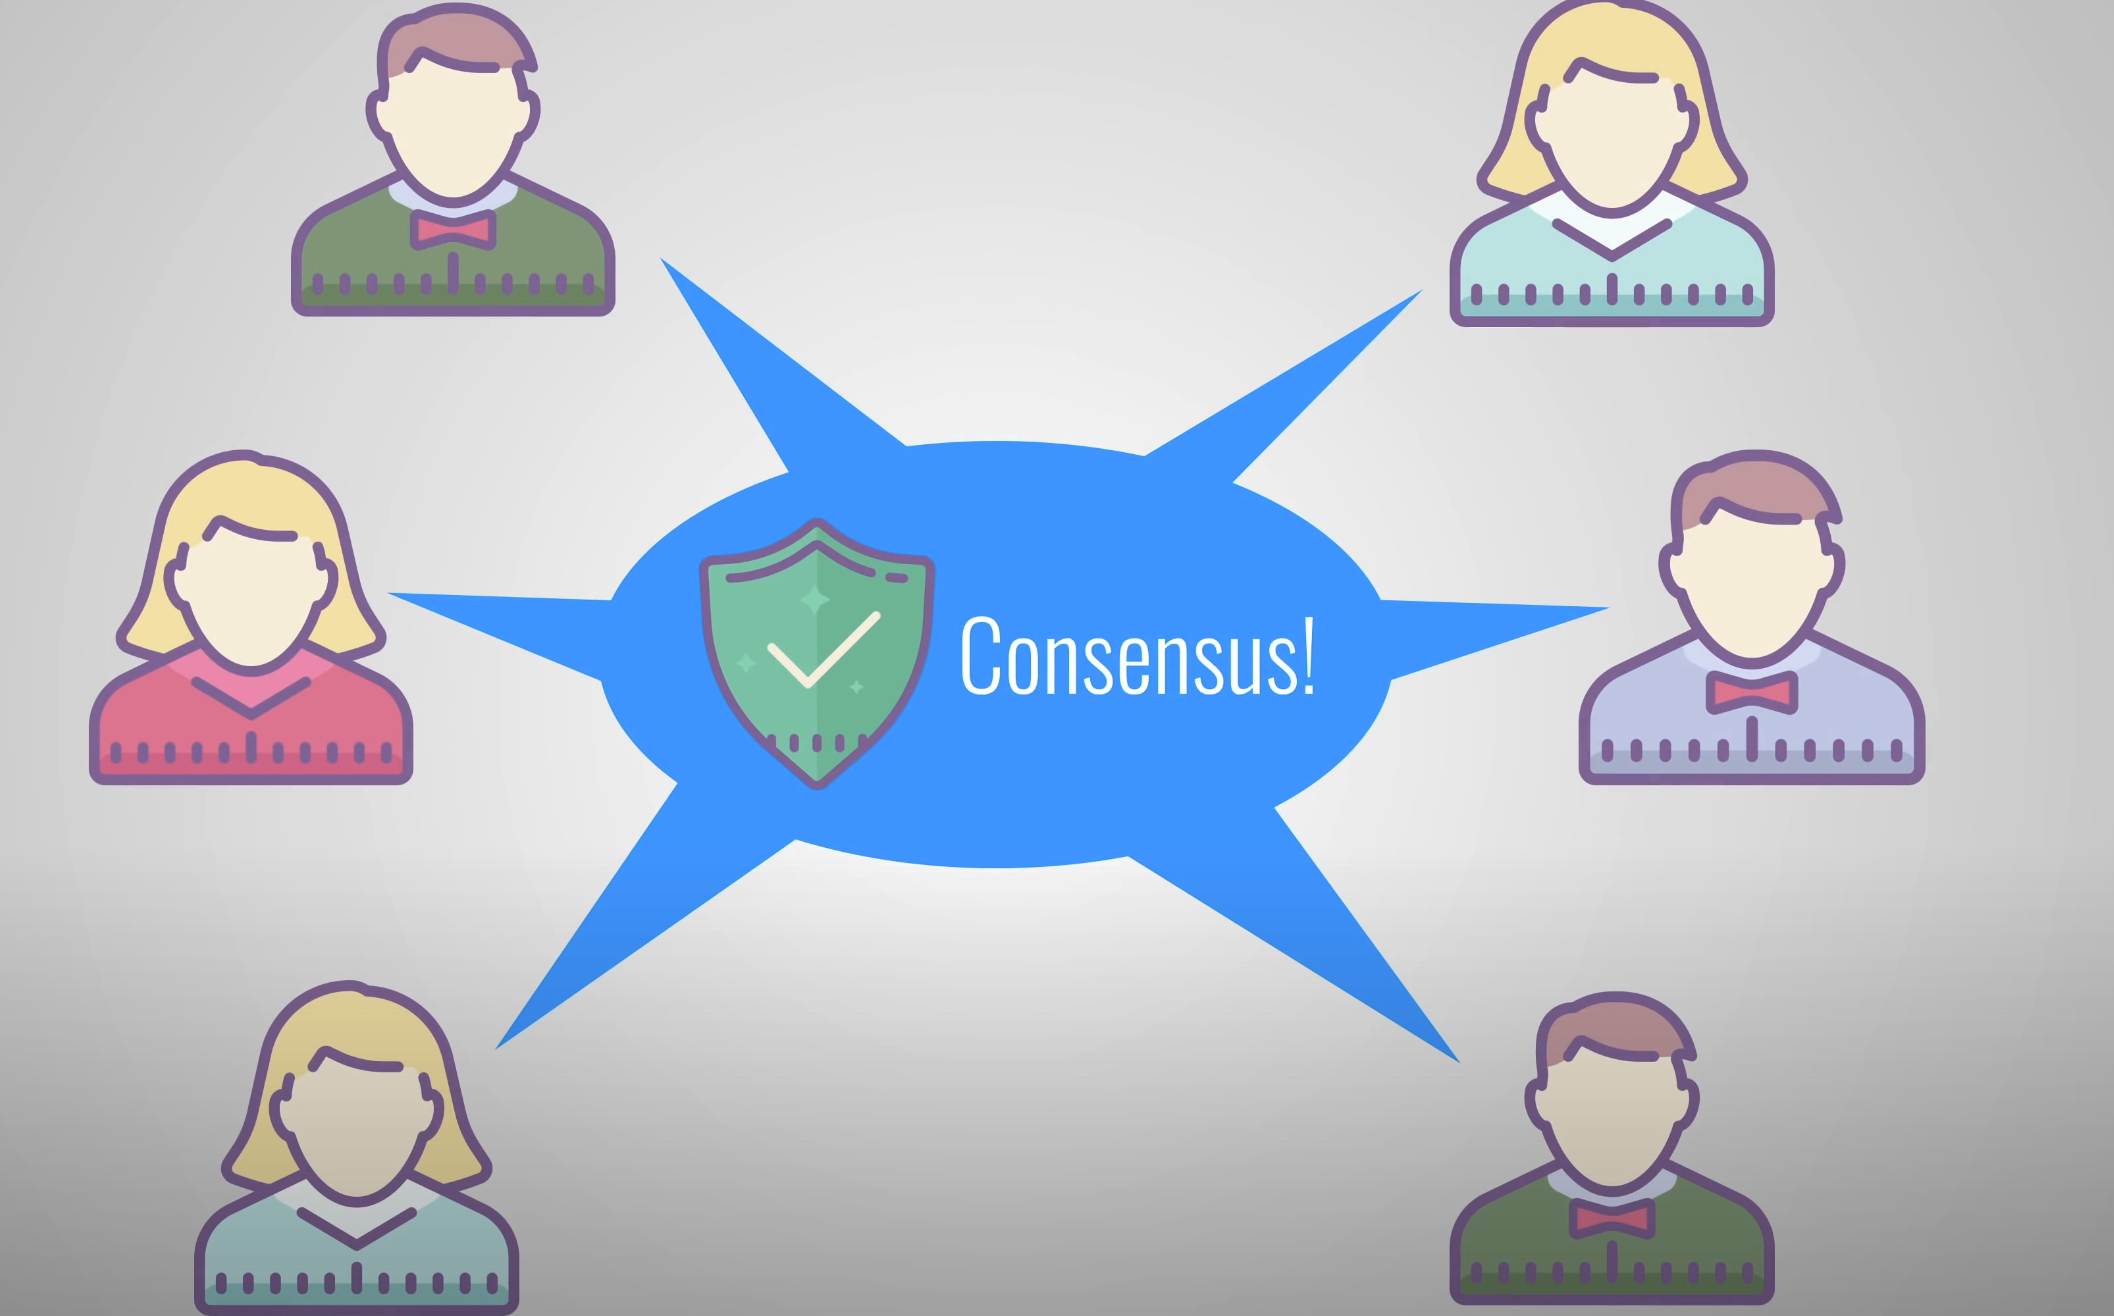

Mechanizm Konsensusu - umożliwia współdziałanie systemów typu rozproszonego wraz z zachowaniem bezpieczeństwa oraz integralności danych.

**W skrócie: wszyscy użytkownicy w sieci posiadają jedną, identyczną informację o stanie sieci oraz informacji w niej zawartych.**

Służy do uzgodnienia stanu sieci, natura systemów rozproszonych sprawia, że musi istnieć sposób na ustalenie, które dane mają być uznawane przez całą sieć jako dane prawdziwe oraz prawidłowe. Nie możliwa jest sytuacja, że jedne komputery posiadają daną informacje a inne jej nie posiadają lub jest ona inna. 

W mechanizmie konsensusu za prawdę uznaje się informację, którą posiada ponad 50% komputerów podłączonych do danej sieci, co znacznie utrudnia manipulacje w przypadku sieci rozległych

Najpopularniejsze algoytmy konsensusu to:


*   Proof of Work (PoW)
*   Proof of Stake (PoS)


# **PROOF OF WORK VS PROOF OF STAKE**

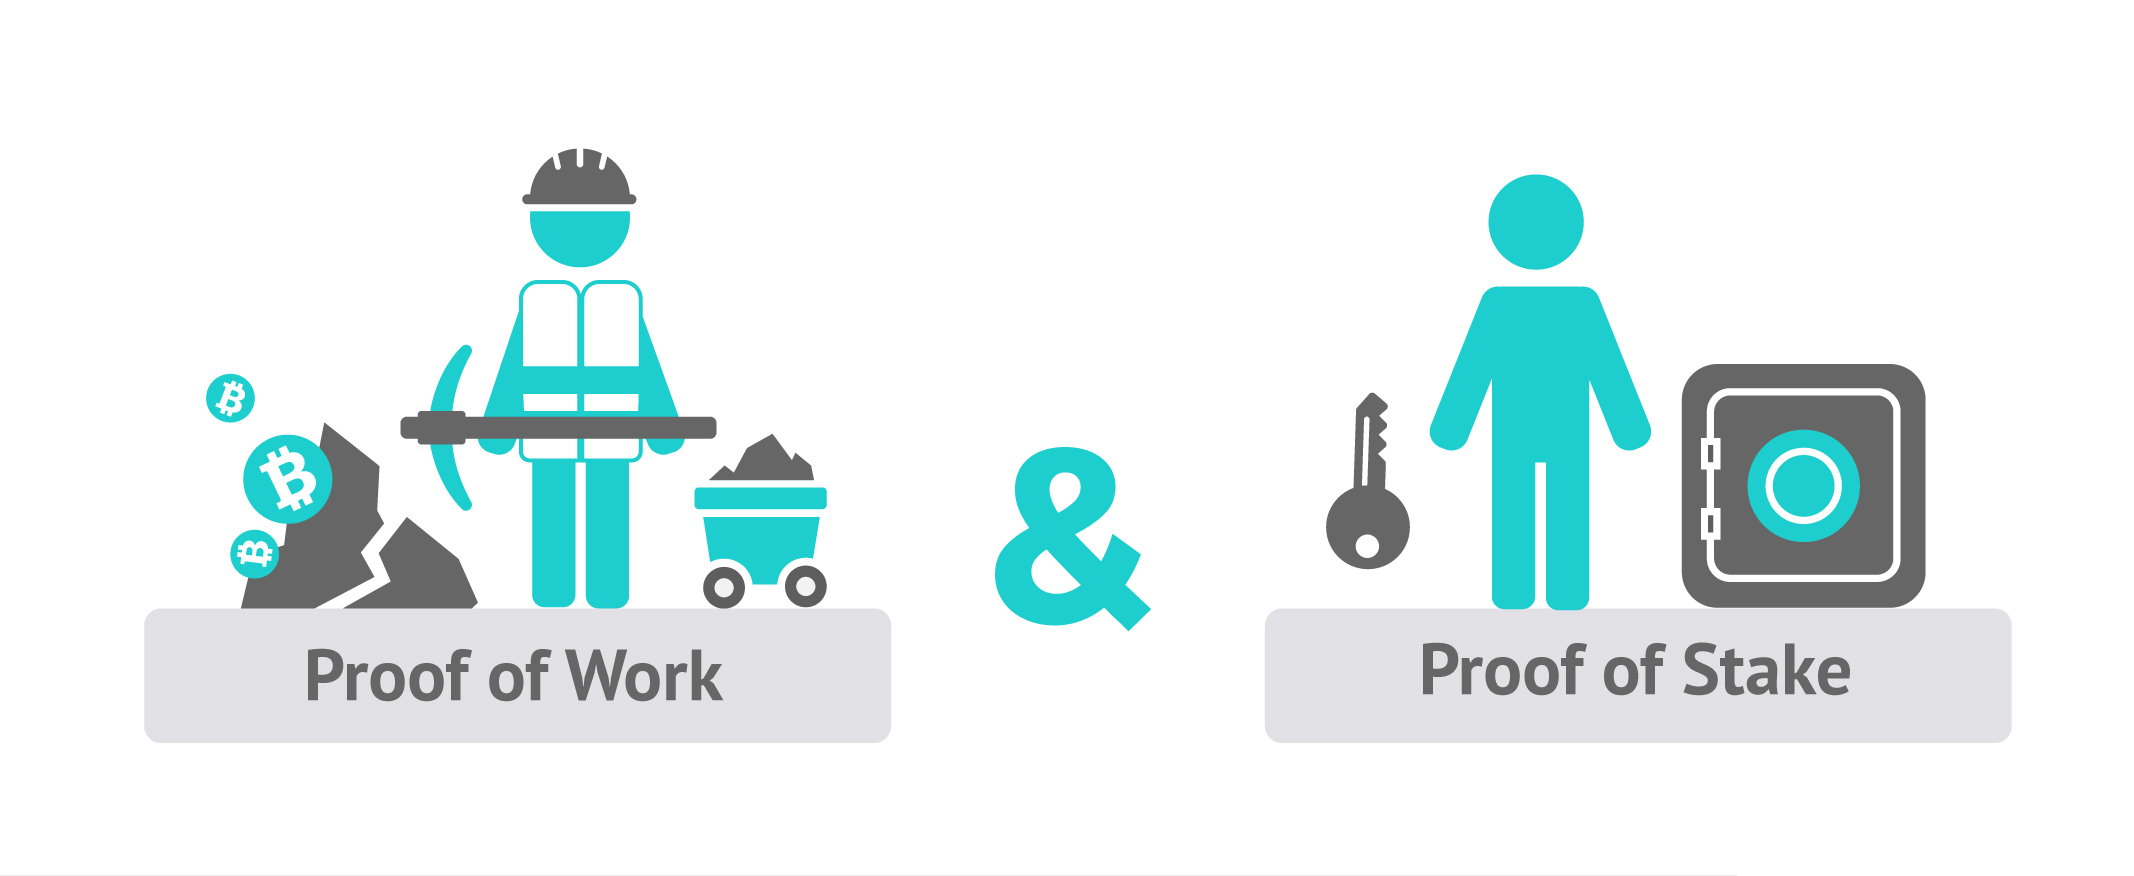

Każda sieć blockchain potrzebuje sposobu potwierdzania autentyczności zachodzących w niej operacji czy transakcji, dlatego w każdej sieci musi istnieć algorytm pozwalający określić nam kto dane operacje może zatwierdzać

Dwoma najpopularniejszymi algorytmami są: Proof Of Work oraz Proof Of Stake

# PROOF OF WORK

Algorytm ten działa poprzez wykonywanie przez górników kryptograficznych "puzli". Pierwsza osoba, która znajdzie rozwiązanie (hash zawierający na początku odpowiednią ilość zer) otrzymuje nagrodę podczas generowania nowego bloku.

 Powoduje to jednak powstawanie coraz to większych "farm" zawierających dziesiątki tysięcy specjalnych GPU przeznaczonych do ciągłego wykonywania funkcji skrótu. Prowadzi to do ogromnego zużycia energii elektrycznej. Sama sieć Bitcoin zużywa rocznie średnio 110 TWh co stanowi ponad 0.5% globalnego zużycia energi i jest większe niż roczne zużycie energi takich państw jak m.in Szwecja czy Szwajcaria.

Im więcej mocy obliczeniowej posiadamy, tym większa szansa na znalezienie odpowiedniego hasha, powoduje to łączenie się ze sobą górników w grupy co z kolei centralizuje całą sieć, czego oczywiście nie chcemy.


# PROOF OF STAKE

Algorytm Proof Of Stake polega na wybraniu jednego węzła w sieci w celu potwierdzenia danego bloku oraz wszystkich zawartych w nim operacji/transakcji

W przeciwieństwie do Proof Of Work nie ma w nim górników, są jedynie jednostki walidujace dane operacje.

Aby jednostka mogła zostać walidatorem musi przekazać daną ilość tokenów do sieci. Tokeny te zostają zablokowane na czas ich obstawiania oraz służą jako zabeczpieczenie przed fałszowaniem operacji. Jeżeli wykryte zostanie, że dana jednostka, która zostałą wybrana do potwierdzania operacji z danego bloku potwierdziłą operacje fałszywe, traci ona część swoich obstawionych tokenów. Jest to skuteczne jeśli traconych tokenów jest więcej niż teoretyczna nagroda, za potwierdzenie fałszywego bloku.

**Uczciwe działanie jest bardziej opłacalne niż działanie nieuczciwe**

Kolejnym zabezpieczeniem jest opóznienie w "wyjęciu" obstawionych tokenów z sieci. Zanim tokeny zostaną oddane musi minąć określony czas, tak aby upewnić się, że sieć zawsze ma możliwość ukarania walidacji fałszywych bloków.

Prawdopodobieństwo zostania wybranym jako walidator danego bloku rośnie liniowo wraz z ilością obstawianych tokenów. Jest to jednak rozwiązanie sprawiedliwsze niż w przypadku algorytmu Proof Of Work, gdyż w nim osoby dysponujące większym kapitałem często mogą zdobyć potrzebny sprzęt w dużo lepszych cenach niż osoby z kapitalem ograniczonym.

Nagrodą za potwierdzenie bloku są wszystkie opłaty, które zostały pobrane za operacje znajdujące się w danym bloku.

Algorytm Proof Of Stake nie wymaga inwestowania w ogromne ilości sprzętu oraz energi elektrycznej przez co jest dużo bardziej przyjazny dla środowiska oraz gospodarki.
